<a href="https://colab.research.google.com/github/kheireldine/Machine-learning-Projects/blob/main/Basic_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Text Classification 
In this model we will be working on IMDB dataset

Firstly, we will add the required Libraries for this project.

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing

We are trying in this project to do the sentiment analysis on a movie reviews.
Note that we are making a binary classifier and we have only 2 classes are Positive and Negative.

In [2]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84140032/84125825 [==============================] - 13s 0us/step


Now, Let's explore the directory structure.

In [3]:
os.listdir(dataset_dir)

['train', 'test', 'imdbEr.txt', 'README', 'imdb.vocab']

As we have seen we have training file, test file, readme,....
Next, we will explore what we have inside the training folder 
Note that we are using the OS library to Join paths

In [4]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['unsupBow.feat',
 'urls_unsup.txt',
 'neg',
 'urls_neg.txt',
 'urls_pos.txt',
 'unsup',
 'labeledBow.feat',
 'pos']

Now, we discovered the files inside the training folder 
Inside the Training folder we have 2 files are neg and pos and they are continuing reviews are negative and positive.
We will take a look on them now

In [14]:
pos_dir = os.path.join(train_dir, 'pos')
os.listdir(pos_dir)

['8760_7.txt',
 '1797_9.txt',
 '6956_8.txt',
 '9575_9.txt',
 '7832_7.txt',
 '5797_8.txt',
 '6796_8.txt',
 '405_10.txt',
 '828_10.txt',
 '2776_8.txt',
 '7707_9.txt',
 '6176_9.txt',
 '1970_9.txt',
 '8488_8.txt',
 '3685_8.txt',
 '8458_10.txt',
 '6831_9.txt',
 '9494_10.txt',
 '5218_7.txt',
 '1385_8.txt',
 '1961_9.txt',
 '6857_10.txt',
 '7105_9.txt',
 '9906_10.txt',
 '895_10.txt',
 '9948_8.txt',
 '10910_10.txt',
 '12086_10.txt',
 '6665_10.txt',
 '9150_8.txt',
 '10972_10.txt',
 '12458_7.txt',
 '7230_8.txt',
 '2314_7.txt',
 '3348_7.txt',
 '3530_7.txt',
 '4538_7.txt',
 '9539_7.txt',
 '10592_8.txt',
 '9250_8.txt',
 '5613_9.txt',
 '2075_8.txt',
 '12187_9.txt',
 '3989_8.txt',
 '1380_7.txt',
 '3371_8.txt',
 '3210_8.txt',
 '251_10.txt',
 '2429_8.txt',
 '313_10.txt',
 '10552_9.txt',
 '539_10.txt',
 '11952_8.txt',
 '10723_8.txt',
 '6151_7.txt',
 '4420_8.txt',
 '483_8.txt',
 '516_10.txt',
 '6814_7.txt',
 '11664_9.txt',
 '2742_9.txt',
 '301_10.txt',
 '9967_10.txt',
 '5588_10.txt',
 '566_8.txt',
 '11782

In [15]:
neg_dir = os.path.join(train_dir, 'neg')
os.listdir(neg_dir)

['5688_2.txt',
 '1938_1.txt',
 '10261_1.txt',
 '1682_2.txt',
 '4934_4.txt',
 '5460_4.txt',
 '11754_4.txt',
 '8529_4.txt',
 '12153_3.txt',
 '4873_1.txt',
 '4006_4.txt',
 '4768_4.txt',
 '5492_3.txt',
 '10004_3.txt',
 '7005_4.txt',
 '12154_1.txt',
 '9973_4.txt',
 '7599_3.txt',
 '9161_1.txt',
 '4708_1.txt',
 '8060_1.txt',
 '9945_1.txt',
 '10446_2.txt',
 '1759_4.txt',
 '7566_1.txt',
 '1428_1.txt',
 '10573_3.txt',
 '12338_1.txt',
 '8425_1.txt',
 '1094_4.txt',
 '6544_1.txt',
 '4706_1.txt',
 '12233_1.txt',
 '5941_1.txt',
 '6157_2.txt',
 '6497_1.txt',
 '8660_1.txt',
 '2496_1.txt',
 '7730_1.txt',
 '1378_1.txt',
 '11814_1.txt',
 '11934_1.txt',
 '1674_2.txt',
 '547_1.txt',
 '10969_4.txt',
 '3213_1.txt',
 '7556_1.txt',
 '7328_2.txt',
 '9079_1.txt',
 '6344_2.txt',
 '9665_2.txt',
 '10449_4.txt',
 '316_1.txt',
 '12125_1.txt',
 '9920_3.txt',
 '618_2.txt',
 '1987_4.txt',
 '4958_1.txt',
 '11530_1.txt',
 '6226_1.txt',
 '8252_3.txt',
 '12200_4.txt',
 '10065_2.txt',
 '7799_1.txt',
 '6643_4.txt',
 '1194_1.tx

In [9]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [16]:
sample_file = os.path.join(train_dir, 'neg/10777_2.txt')
with open(sample_file) as f:
  print(f.read())

Shame on Julia Roberts and John Cusack. They are so talented and should not have had any part in this movie. The storyline was dumb and predictable. The jokes were not funny. The romance was not really romance. I was all too happy when this movie ended.


We loaded the negative and positive files and we have seen 2 reviews 1 positive and 1 negative 

To prepare a dataset for binary classification, you will need two folders on disk, corresponding to class_a and class_b. These will be the positive and negative movie reviews, which can be found in aclImdb/train/pos and aclImdb/train/neg. As the IMDB dataset contains additional folders, you will remove them before using this utility.


In [17]:
unsup_dir = os.path.join(train_dir, 'unsup')
os.listdir(unsup_dir)

['10245_0.txt',
 '36339_0.txt',
 '17456_0.txt',
 '10407_0.txt',
 '27363_0.txt',
 '28659_0.txt',
 '18499_0.txt',
 '12502_0.txt',
 '22326_0.txt',
 '6683_0.txt',
 '19355_0.txt',
 '34871_0.txt',
 '8032_0.txt',
 '10945_0.txt',
 '19405_0.txt',
 '30281_0.txt',
 '35707_0.txt',
 '43795_0.txt',
 '38015_0.txt',
 '2751_0.txt',
 '4442_0.txt',
 '23339_0.txt',
 '44363_0.txt',
 '7739_0.txt',
 '15803_0.txt',
 '37412_0.txt',
 '24872_0.txt',
 '33436_0.txt',
 '20219_0.txt',
 '39507_0.txt',
 '45492_0.txt',
 '23128_0.txt',
 '28481_0.txt',
 '1038_0.txt',
 '29284_0.txt',
 '23955_0.txt',
 '49611_0.txt',
 '4821_0.txt',
 '35958_0.txt',
 '4725_0.txt',
 '10282_0.txt',
 '16920_0.txt',
 '5746_0.txt',
 '39575_0.txt',
 '37071_0.txt',
 '14438_0.txt',
 '4836_0.txt',
 '35105_0.txt',
 '8536_0.txt',
 '12466_0.txt',
 '18196_0.txt',
 '34107_0.txt',
 '19685_0.txt',
 '21350_0.txt',
 '10854_0.txt',
 '706_0.txt',
 '24396_0.txt',
 '44481_0.txt',
 '48841_0.txt',
 '19380_0.txt',
 '16844_0.txt',
 '19147_0.txt',
 '34292_0.txt',
 '662

In [18]:
samp = os.path.join(train_dir, 'unsup/40545_0.txt')
with open(samp) as f:
  print(f.read())


I was most intrigued by the set decorations - or lack of them in this peculiar photoplay. Our seemingly lonely two stars live in a bayou house on stilts and never clean they only well, you know, have lots of sex.<br /><br />I rented this movie and shut it off after the first twenty minutes only to return to find out if they ever cleaned up. I can't tell you the ending that would spoil all the fun. I suppose if you can make it through the first reel you are hooked.<br /><br />I think that Natasha Wagner has quite a career ahead of her and I look forward to more, but, this is one of the bombs, sorry.


In [19]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

Our dataset is ready and now we will use:
the text_dataset_from_directory utility to create a labeled tf.data.Dataset. tf.data is a powerful collection of tools for working with data.
When running a machine learning experiment, it is a best practice to divide your dataset into three splits: train, validation, and test.

The IMDB dataset has already been divided into train and test, but it lacks a validation set. Let's create a validation set using an 80:20 split of the training data by using the validation_split argument below.


In [20]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [21]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [22]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [23]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [24]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


# Preparation of dataset for training

Now we are going to standardize, tokenize, and vectorize the data using the helpful preprocessing.TextVectorization layer.


*   Standardization refers to preprocessing the text, typically to remove
punctuation or HTML elements to simplify the dataset. 
*  Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace). 
*  Vectorization refers to converting tokens into numbers so they can be fed into a neural network. All of these tasks can be accomplished with this layer.

**Standardization**

In [25]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

**Vectorization**

Next, you will create a TextVectorization layer. You will use this layer to standardize, tokenize, and vectorize our data. You set the output_mode to int to create unique integer indices for each token.

Note that you're using the default split function, and the custom standardization function you defined above. You'll also define some constants for the model, like an explicit maximum sequence_length, which will cause the layer to pad or truncate sequences to exactly sequence_length values.

In [26]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

Next, you will call adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.

In [27]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

Let's create a function to see the result of using this layer to preprocess some data.

In [28]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [29]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [33]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [34]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

Configure the dataset for performance
These are two important methods you should use when loading data to make sure that I/O does not become blocking.

.cache() keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.

You can learn more about both methods, as well as how to cache data to disk in the data performance guide.

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model


In [36]:
embedding_dim=16
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [38]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 12s 17ms/step - loss: 0.6652 - binary_accuracy: 0.6927 - val_loss: 0.6160 - val_binary_accuracy: 0.7722
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5491 - binary_accuracy: 0.8003 - val_loss: 0.4984 - val_binary_accuracy: 0.8206
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4454 - binary_accuracy: 0.8453 - val_loss: 0.4204 - val_binary_accuracy: 0.8478
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3782 - binary_accuracy: 0.8655 - val_loss: 0.3736 - val_binary_accuracy: 0.8594
Epoch 5/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3354 - binary_accuracy: 0.8780 - val_loss: 0.3448 - val_binary_accuracy: 0.8658
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3056 - binary_accuracy: 0.8870 - val_loss: 0.3262 - val_binary_accuracy: 0.8710
Epoch 7/10
625/625 [==============================] - 5s 7ms/s

# Evaluate the model

In [39]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 9s 11ms/step - loss: 0.3109 - binary_accuracy: 0.8726
Loss:  0.31085336208343506
Accuracy:  0.8726400136947632


Creta a plot of loss and accuracy over time 


In [40]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

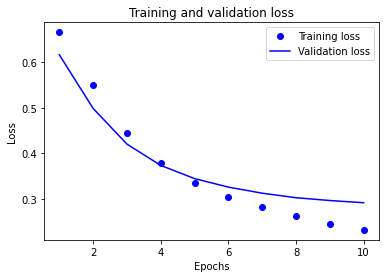

In [41]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

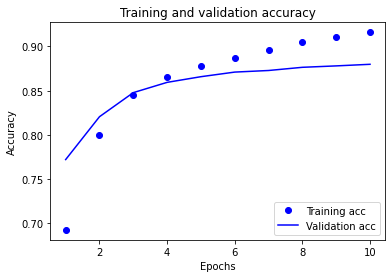

In [42]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Model Export
The model is ready now, let's export it

In [43]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 9s 11ms/step - loss: 0.3109 - accuracy: 0.8726
0.8726400136947632


 **Inference on new data**

In [54]:
examples = [
  "The movie was great!",
  "Hello",
  "The movie was too bad",
  "The movie is so great",
  "Null",
  "The movie was too ugly",
  "It was amazing",
  "unacceptable"
]

export_model.predict(examples)

array([[0.59862113],
       [0.5005803 ],
       [0.31752935],
       [0.62013036],
       [0.49068472],
       [0.38935405],
       [0.63855195],
       [0.49068472]], dtype=float32)